In [1]:
import os
import pandas as pd
from dotenv import load_dotenv
load_dotenv("../.env")

True

In [2]:
##### 相关参数

In [3]:
method = 'aicso3'
categories = 'o2o'
horizon = 1
train_days = 20
val_days = 5
model_name = 'sac_base'
env_name = 'hedge041'
code = 'IM'
direction = 'long'

In [4]:
index = {
    "46": "model15000",
    "47": "model8000",
    "48": "model5000",
    "49": "model3000"
}
index = {"47": "best_model"}

In [5]:
def fetch_profit(index, model_index):
    method1 = 'test' if 'kimto' not in method else 'val'
    dirs = os.path.join(
    "../",
    os.environ['RECORDS_PATH'], 'agent', method, 'g_instruments', 'rolling', 'normal_factors3',
    method1, str(train_days), str(val_days), 
    "{0}_{1}".format(categories, str(horizon)),
    str(index), "{0}_{1}_{2}_{3}".format(model_name, env_name, code,
                                          str(direction)))
    filename = os.path.join(dirs, "{0}_{1}_profit.feather".format(index, model_index))
    return pd.read_feather(filename)

In [6]:
res = []
for k, v in index.items():
    profit = fetch_profit(k, v)
    res.append(profit)

In [7]:
profit1 = pd.concat(res,axis=0)
profit1['trade_date'] = pd.to_datetime(profit1['trade_time']).dt.strftime('%Y-%m-%d')
profit1 = profit1.groupby('trade_date')['profit'].sum().reset_index()
profit1 = profit1.set_index('trade_date')

In [8]:
profit1

,profit
trade_date,
2025-01-16,3831.947369
2025-01-17,17158.982704
2025-01-20,14785.535292
2025-01-21,381.935093
2025-01-22,-2588.398339
2025-01-23,-13161.503309


<Axes: xlabel='trade_date'>

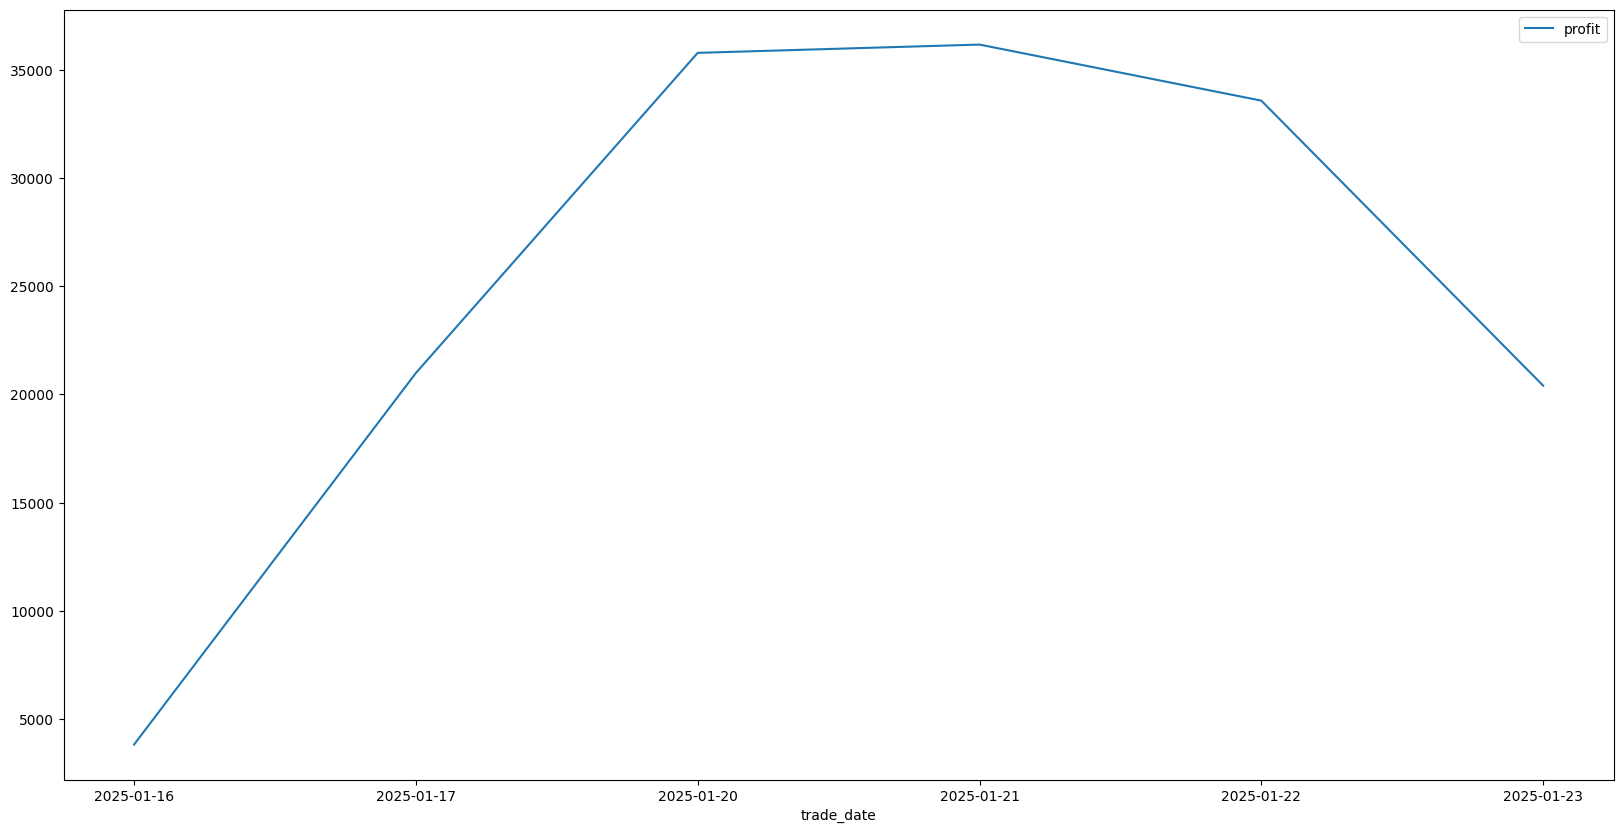

In [9]:
profit1.cumsum().plot(figsize=(20,10))

In [9]:
profit1.reset_index().to_feather('long_profit.feather')